# Mooney-Rivlin; Critical Torsion

In [3]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
from scipy.optimize import fsolve

In [4]:
"""
    This program is used to visualise the Critical Torsion Values experienced by
    a rubber rod that is experiencing torsion.
    
    Critical Torsion is the point wherein the change in Total Strain Energy in 
    the system is 0. When this point is reached, the rubber rod will undergo a
    deformation resulting in a knot forming among the rod.
    
    We are looking at the Mooney Rivlin model of a hyperelastic material in 
    hopes of producing a graph that more accurately represents the critical torsion
    needed to form a knot.
    
    For convenience sake, the Neo-Hookean model used by Gent in his paper is 
    also graphed
"""

## Initialise our 2 constants C_1, C_2.
## For a Neo-Hookean material, C_2 = 0
C_1, C_2 = 0.3101, 1.2916
## Let C = C_2 / C_1
C = C_2 / C_1


## x0 is our initial guess used for our equation solver
x0 = 0.1

## Initialise our Critical Torsion Arrays
N = 1000
a_phi_hook = np.ndarray((N))
a_phi_mr = np.ndarray((N))

## Initialise Lambda array
## Lambda = 1 results in a singularity, set start to lambda + \epsilon
epsilon = 1e-6
lamb = np.linspace(1+epsilon, 3.5, N)


## Begin `for` loop
## This `for` loop loop's over each lambda value
## Each loop defines the Critical Neo-Hookean and Critical Mooney-Rivlin formulae
##  for each lambda. We then utilise the Scipy function `fsolve` which returns the
##  roots of both functions, and inputs them into their respective a_phi_xxx arrays

for i in range(N):
    
    ## Defining the Critical Neo-Hookean formula
    def CritHook(x, lamb=lamb[i]):
        
        ## Compartmentalise formula
        k = 4 * ( 1 - 1 / (lamb**3) )
        alpha = ( 2 * scipy.pi * x**2 / lamb )
        beta = ( scipy.pi - x / (lamb**(1/2)) ) ** (-1)
        
        Neo_Hookean = -(alpha / (2*scipy.pi)) + ( alpha * beta )

        return k - Neo_Hookean
    
    
    ## Defining the Critical Mooney-Rivlin formula
    def CritMR(x, lamb=lamb[i]):
        
        ## Compartmentalise formula
        k = 4 * (1 - 1 / (lamb**3))
        alpha = (2 * scipy.pi * x**2 / lamb)
        beta = (scipy.pi - x / (lamb**(1/2)) ) ** (-1)
        
        Neo_Hookean = -(alpha / (2*scipy.pi)) + ( alpha * beta)
        Mooney_Rivlin = (1 / lamb) * C * ( alpha * beta - k)

        return k - (Neo_Hookean + Mooney_Rivlin)
    
    
    ## Applies initial guess if it is our first step.
    ## Afterwards, uses previous root as our guess.
    if i == 0:
        a_phi_hook[i] = fsolve(CritHook, x0)
        a_phi_mr[i] = fsolve(CritMR, x0)
    else:
        a_phi_hook[i] = fsolve(CritHook, a_phi_hook[i-1])
        a_phi_mr[i] = fsolve(CritMR, a_phi_mr[i-1])



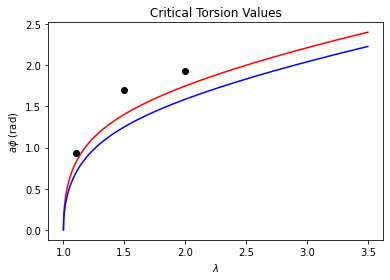

In [7]:
## Defining plot parameters
plt.figure(1)

plt.title("Critical Torsion Values")
plt.plot(lamb, a_phi_hook, "r")#, label="Neo-Hookean ($C_1$ = {}, $C_2$ = {})".format(C_1, 0))
plt.plot(lamb, a_phi_mr, "b")#, label="Mooney-Rivlin ($C_1$ = {}, $C_2$ = {})".format(C_1, C_2))
plt.plot((1.1, 1.5, 2), (0.940, 1.704, 1.924), "ko")#, label ="Gent's experimental data for diameter = 4.7mm")
plt.xlabel("$\lambda$")
plt.ylabel("$a\phi$ (rad)")
#plt.legend()

plt.savefig("StrainEnergy.png")


plt.show()

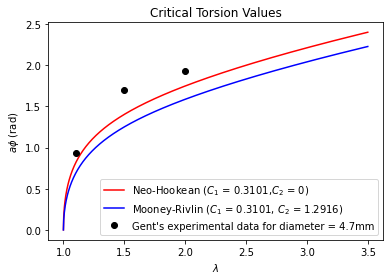

In [5]:
## Defining plot parameters
plt.figure(1)
plt.title("Critical Torsion Values")

plt.plot(lamb, a_phi_hook, "r", 
        label="Neo-Hookean ($C_1$ = {},$C_2$ = {})".format(C_1, 0))
        
plt.plot(lamb, a_phi_mr, "b",
        label="Mooney-Rivlin ($C_1$ = {}, $C_2$ = {})".format(C_1, C_2))
        
plt.plot((1.1, 1.5, 2), (0.940, 1.704, 1.924), "ko",
        label ="Gent's experimental data for diameter = 4.7mm")
        
plt.xlabel("$\lambda$")
plt.ylabel("$a\phi$ (rad)")
plt.legend()

plt.show()
